# Freqgen Example Use

We are going to recode the GFP gene from _Aequorea victoria_ to match the highly expressed genes of _Escherichia coli_.

In [1]:
from Bio import SeqIO

# first, get the sequence of GFP
insert = SeqIO.read("example_seqs/gfp.fasta", "fasta").seq
insert

Seq('ATGAGTAAAGGAGAAGAACTTTTCACTGGAGTTGTCCCAATTCTTGTTGAATTA...TAA', SingleLetterAlphabet())

In [2]:
# next, we'll get the sequences of the highly expressed E. coli genes
target = []
with open("example_seqs/ecoli.heg.fasta", "r") as handle:
        for seq in SeqIO.parse(handle, "fasta"):
            seq = str(seq.seq)
            target.append(seq)

In [64]:
import freqgen
from datetime import datetime

k = 2
    
target_freqs = freqgen.k_mer_frequencies(target, k)
start = datetime.now()
result = freqgen.generate({k: target_freqs}, insert.translate(), verbose=True, mode="ED")
print("duration:", datetime.now() - start)

insert_freqs = freqgen.k_mer_frequencies(insert, k)
result_freqs = freqgen.k_mer_frequencies(result, k)

Gen: 191        Since Improvement: 50/50      Fitness: 0.009455591900147605
duration: 0:01:51.945658


In [65]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print("generating rectangles!")
N = len(result_freqs)
ind = np.arange(N)  # the x locations for the groups


generating rectangles!


fixing axes!
plotting!


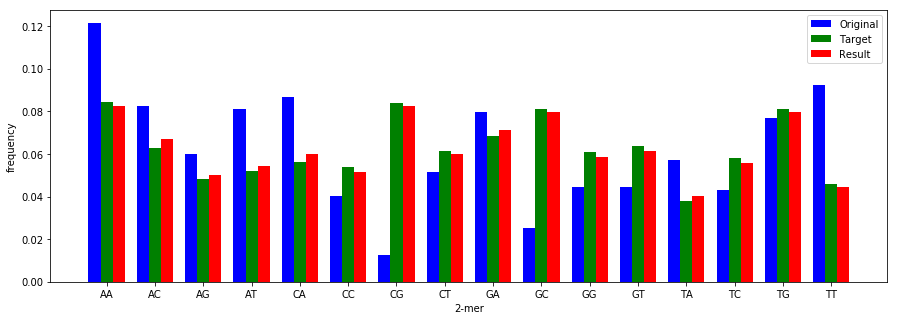

In [70]:

width = 0.25       # the width of the bars
fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(ind, [insert_freqs[key] for key in sorted(insert_freqs.keys())], width, color='b')
rects2 = ax.bar(ind + width, [target_freqs[key] for key in sorted(target_freqs.keys())], width, color='g')
rects3 = ax.bar(ind + 2*width, [result_freqs[key] for key in sorted(result_freqs.keys())], width, color='r')

print("fixing axes!")
# add some text for labels, title and axes ticks
ax.set_xticks(ind + 2*width / 2)
ax.set_xticklabels([f"{i}" for i in sorted(insert_freqs.keys())])
ax.legend((rects1[0], rects2[0], rects3[0]), ('Original', 'Target', "Result"))
ax.set_xlabel("2-mer")
ax.set_ylabel("frequency")

print("plotting!")
plt.show()

In [67]:
errors = []
for kmer in result_freqs:
    error = abs(result_freqs[kmer] - target_freqs[kmer]) / target_freqs[kmer]
    errors.append(error)
    print(target_freqs[kmer], result_freqs[kmer], error)

0.08418121898556763 0.0824022346368715 0.02113279387176754
0.05179741656880942 0.05446927374301676 0.05158282692840387
0.04839198454486912 0.05027932960893855 0.039001191660562706
0.06270313269442024 0.0670391061452514 0.06915082651391997
0.03792946702526611 0.040502793296089384 0.06784504166929353
0.045694912686086595 0.0446927374301676 0.021931878124020192
0.08110155687715444 0.07960893854748603 0.018404311669741345
0.05809689760975795 0.055865921787709494 0.03840094589962647
0.06859729535209667 0.0712290502793296 0.038365287052858854
0.06382059926512368 0.061452513966480445 0.03710534413513933
0.060718209023069056 0.05865921787709497 0.03391060406923066
0.08118868138944657 0.07960893854748603 0.01945767334713584
0.056411227698018866 0.06005586592178771 0.06460838333956062
0.06150611765597182 0.06005586592178771 0.023578983513411523
0.08407136633963408 0.0824022346368715 0.019853747779232767
0.05378991628470776 0.051675977653631286 0.03929990557872378


In [68]:
import numpy as np
errors = np.array(errors)

In [69]:
errors.mean()

0.037726859072039313